# Agrupando colores

Vamos a crear imagenes con una cantidad fija de colores

#### 1. Importa las librerias
Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`


In [2]:
from sklearn.cluster import KMeans
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

#### 2. Lee una imagen
Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el kmeans

In [3]:
img = imread('fiona.jpeg')
img.shape

(3456, 4608, 3)

In [4]:
img.dtype

dtype('uint8')

img.ndim -> x, y, color (3)

In [5]:
3456 * 4608

15925248

In [6]:
img

array([[[108, 111,  92],
        [107, 110,  91],
        [106, 109,  90],
        ...,
        [161, 161, 159],
        [160, 160, 158],
        [160, 160, 158]],

       [[107, 110,  91],
        [107, 110,  91],
        [107, 110,  91],
        ...,
        [161, 161, 159],
        [159, 159, 157],
        [159, 159, 157]],

       [[106, 109,  90],
        [106, 109,  90],
        [108, 111,  92],
        ...,
        [160, 160, 158],
        [158, 158, 156],
        [157, 157, 155]],

       ...,

       [[186, 187, 189],
        [186, 187, 189],
        [186, 187, 189],
        ...,
        [196, 197, 199],
        [197, 198, 200],
        [198, 199, 201]],

       [[186, 187, 189],
        [186, 187, 189],
        [186, 187, 189],
        ...,
        [196, 197, 199],
        [197, 198, 200],
        [198, 199, 201]],

       [[186, 187, 189],
        [186, 187, 189],
        [186, 187, 189],
        ...,
        [196, 197, 199],
        [197, 198, 200],
        [198, 199, 201]]

Muestra la imagen para ver que se ha cargado bien

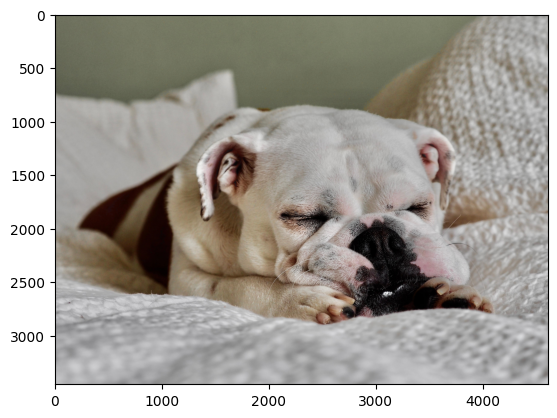

In [3]:
plt.imshow(img)

#### 3. Modifica la estructura de la imagen
Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

In [4]:
X = img.reshape(-1, 3)
X.shape

(15925248, 3)

#### 4. K-means
Haz un k-means con la imagen de entrada (Con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida

In [7]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=10).fit(X)
kmeans.labels_

array([6, 6, 6, ..., 3, 3, 3], shape=(15925248,), dtype=int32)

#### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el kmeans entre otros parametros de salida tiene `cluster_centers_` y `labels_`. Utilizlos para crear una nueva imagen (recuerda que las imagenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

In [9]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]


#### 6. Modifica la estructura de la imagen
Para trabajar con el k-means requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver mostrarla debemos hacer el proceso inverso a el paso 3. (Si has guardado la forma de la imagen original te será más facil hacer este paso)

In [10]:
segmented_img = segmented_img.reshape(img.shape)


#### 7. Imprime y guarda en tu ordenador la imagen resultante

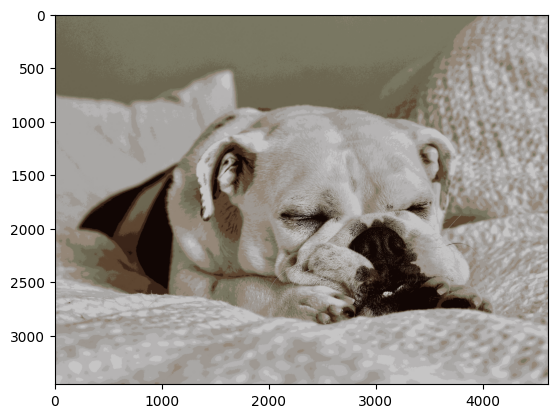

In [ ]:
plt.imshow( segmented_img.astype(np.uint8))


In [12]:
plt.imsave('fiona_segmented_img.png', segmented_img.astype(np.uint8))

bajamos la tonalidad para poder trabajar luego con la img. cortes limpios. 10 colores. quitar peso para poder meterlo en un modelo predictivo.

#### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar o mostrar por pantalla

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.image import imsave

def segmentar_imagen_kmeans(imagen_array, n_colores=8, mostrar=True, guardar=False, ruta_guardado='imagen_segmentada.png'):

    img = imagen_array.copy()
    
    original_shape = img.shape
    X = img.reshape(-1, 3)

    # KMeans clustering
    kmeans = KMeans(n_clusters=n_colores, n_init=10, random_state=10)
    kmeans.fit(X)

    # Reemplazar cada píxel por su centroide
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]

    # Reconstruir imagen
    imagen_segmentada = segmented_img.reshape(original_shape)
    imagen_segmentada = imagen_segmentada.astype(np.uint8)

    # Mostrar
    if mostrar:
        plt.imshow(imagen_segmentada)
        plt.title(f'Imagen segmentada (K={n_colores})')
        plt.axis('off')
        plt.show()

    # Guardar
    if guardar:
        imsave(ruta_guardado, imagen_segmentada)

    return imagen_segmentada


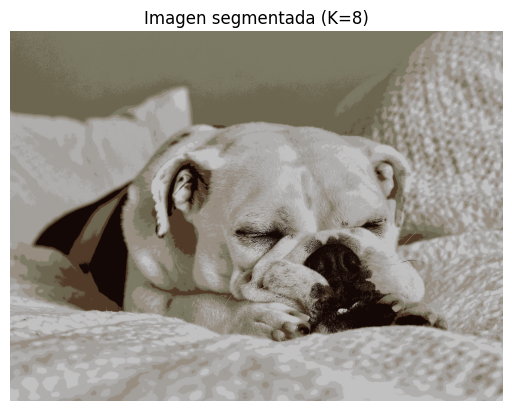

In [16]:
from matplotlib.image import imread

# Cargar imagen
imagen = imread('fiona.jpeg')  # o .png, .jpeg, etc.

# Ejecutar la función
segmentada = segmentar_imagen_kmeans(imagen,  mostrar=True, guardar=True, ruta_guardado='segmentada_k8.png')


A traves de Streamlit approvechar hacer una interfaz. Recomendado hacer un pkl del modelo entrenado para que funcione rápido; es como hay que hacerlo.

``drag and drop``; ``show image`` templates de Streamlit

``OJO``: hace falta reshape dado que Kmeans requiere de forma esplicita el pixel y no (altura, anchura).